# Malignancy classification with ANNs

**Goal**: We aim to classify malignancy of breast cancer with numerical features of each cell nucleus.

**Procedure**:
- **Download Data File**
    - Download data from kaggle: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/     
    (*This repository does not contain the data csv file; download and place 'data.csv' file under the 'data' directory*)

- **Data Preparation**
    - Normalize numerical features
    - Encode categorical labels
    - Split (Train-Test)
    
- **Training**
    - Create an ANN model (with tf2)
    - Set hyperparameters (# neurons & layers, dropout, weight decay, etc)

- **Assessing the result**
    - Plot loss and accuracy

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import preprocessing

## Import, clean, and split dataset

In [2]:
data = pd.read_csv("data/data.csv")

X = data.drop(['id', 'diagnosis', 'Unnamed: 32'], 
              inplace=False,
              axis=1)
y = data['diagnosis']

# normalize numerical (all, in this case) columns of X.
X = X.apply(lambda x:(x - x.mean()) / (x.std()), axis=0)

# encode labels in Y.
encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2)

## Define and train a model

In [18]:
def get_model():
    model = keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[X_train.shape[1]]),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.002)
    
    model.compile(loss = 'binary_crossentropy', 
                  optimizer = 'rmsprop', 
                  metrics = ['accuracy'])    
    return model 

model = get_model()

In [19]:
history = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test),
                    epochs=100,
                    batch_size=20)

Epoch 1/100
23/23 [==============================] - 0s 6ms/step - loss: 2.3396 - accuracy: 0.7033 - val_loss: 0.5973 - val_accuracy: 0.7544
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.8169 - accuracy: 0.8352 - val_loss: 0.4596 - val_accuracy: 0.8684
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7996 - accuracy: 0.8484 - val_loss: 0.4019 - val_accuracy: 0.9123
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4477 - accuracy: 0.8857 - val_loss: 0.3645 - val_accuracy: 0.9386
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6039 - accuracy: 0.8967 - val_loss: 0.2281 - val_accuracy: 0.9474
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.8945 - val_loss: 0.2091 - val_accuracy: 0.9474
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.9099 - val_loss: 0.1940 - val_accuracy: 0.9649
Epoch 8/100
2

Epoch 59/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0810 - accuracy: 0.9890 - val_loss: 0.2707 - val_accuracy: 0.9825
Epoch 60/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1516 - accuracy: 0.9802 - val_loss: 0.2709 - val_accuracy: 0.9825
Epoch 61/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1108 - accuracy: 0.9890 - val_loss: 0.2711 - val_accuracy: 0.9825
Epoch 62/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1210 - accuracy: 0.9824 - val_loss: 0.2709 - val_accuracy: 0.9825
Epoch 63/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1775 - accuracy: 0.9846 - val_loss: 0.2712 - val_accuracy: 0.9825
Epoch 64/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0770 - accuracy: 0.9890 - val_loss: 0.2717 - val_accuracy: 0.9825
Epoch 65/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1500 - accuracy: 0.9890 - val_loss: 0.2715 - val_accuracy: 0.9825
Epoch 

## Plot loss & accuracy

### Loss (train & validation)

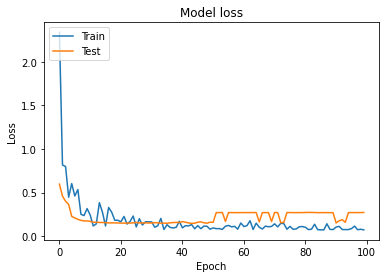

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

### Accuracy (train & validation)

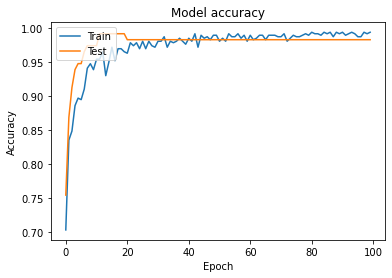

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [33]:
# print the final result

_, accuracy_test = model.evaluate(X_test, y_test)

print("test accuracy:", accuracy_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.2723 - accuracy: 0.9825
test accuracy: 0.9824561476707458


*I tuned some hyperparameters (dropout, # neurons, etc) based on above graphs to optimize validaction accuracy.*